In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
data=pd.read_csv("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [46]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [47]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

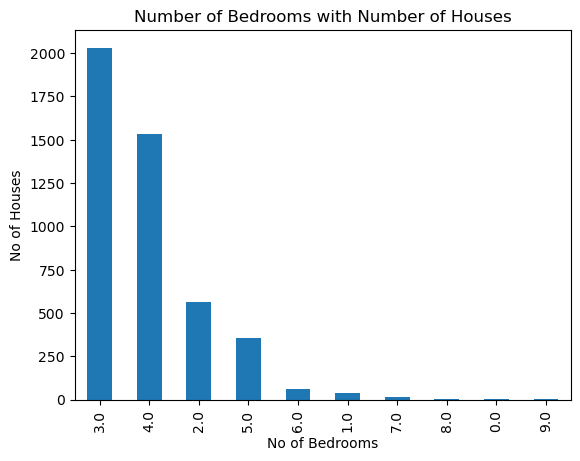

In [40]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel("No of Bedrooms")
plt.ylabel("No of Houses")
plt.title("Number of Bedrooms with Number of Houses")
sns.despine

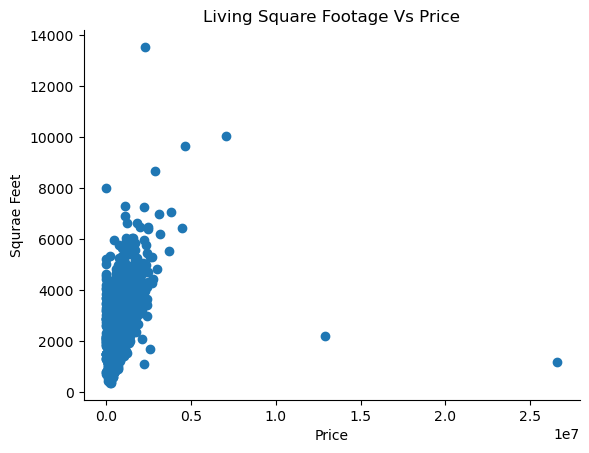

In [41]:
plt.scatter(data.price,data.sqft_living)
plt.xlabel('Price')
plt.ylabel('Squrae Feet')
plt.title("Living Square Footage Vs Price")
sns.despine()

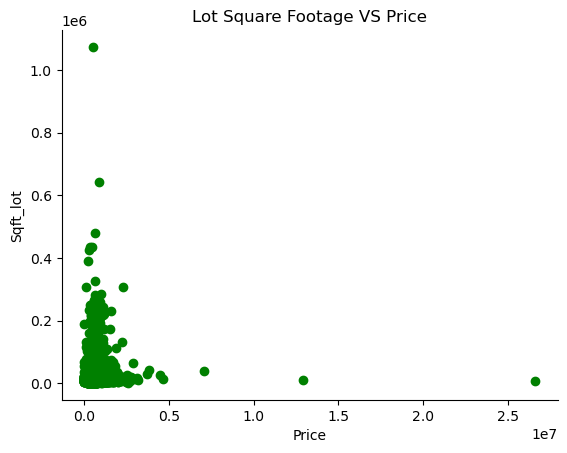

In [42]:
plt.scatter(data.price,data.sqft_lot,color='green',marker='o')
plt.xlabel("Price")
plt.ylabel("Sqft_lot")
plt.title("Lot Square Footage VS Price")
sns.despine()

In [92]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


# 

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [80]:
data1 = data

X = data1.drop('price', axis=1)  
y = data1['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [81]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [82]:

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train_scaled)

Ridge()

In [83]:

y_pred_scaled = ridge_model.predict(X_test_scaled)
y_train_pred_scaled = ridge_model.predict(X_train_scaled)


y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()


r2_ridge_train = r2_score(y_train, y_train_pred)
r2_ridge_test = r2_score(y_test, y_pred)
print("Ridge R2 Train Score:", r2_ridge_train)
print("Ridge R2 Test Score:", r2_ridge_test)


mse_ridge_train = mean_squared_error(y_train, y_train_pred)
mse_ridge_test = mean_squared_error(y_test, y_pred)
print("Ridge Mean Squared Error of Train:", mse_ridge_train)
print("Ridge Mean Squared Error of Test:", mse_ridge_test)

Ridge R2 Train Score: 0.5441853194615951
Ridge R2 Test Score: 0.03229574616370945
Ridge Mean Squared Error of Train: 64764836872.79177
Ridge Mean Squared Error of Test: 986909641561.5182


In [84]:

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr_scaled = linear_model.predict(X_test_scaled)
y_train_pred_lr_scaled = linear_model.predict(X_train_scaled)

y_pred_lr = sc_y.inverse_transform(y_pred_lr_scaled.reshape(-1, 1)).flatten()
y_train_pred_lr = sc_y.inverse_transform(y_train_pred_lr_scaled.reshape(-1, 1)).flatten()


r2_lr_train = r2_score(y_train, y_train_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Train Score:", r2_lr_train)
print("Linear Regression R2 Test Score:", r2_lr_test)


mse_lr_train = mean_squared_error(y_train, y_train_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error of Train:", mse_lr_train)
print("Linear Regression Mean Squared Error of Test:", mse_lr_test)

Linear Regression R2 Train Score: 0.544185359314763
Linear Regression R2 Test Score: 0.03228385663277078
Linear Regression Mean Squared Error of Train: 64764831210.21875
Linear Regression Mean Squared Error of Test: 986921767056.1313


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [87]:

y_pred_tree_scaled = dec_tree.predict(X_test_scaled)
y_train_pred_tree_scaled = dec_tree.predict(X_train_scaled)


y_pred_tree = sc_y.inverse_transform(y_pred_tree_scaled.reshape(-1, 1)).flatten()
y_train_pred_tree = sc_y.inverse_transform(y_train_pred_tree_scaled.reshape(-1, 1)).flatten()


r2_tree_train = r2_score(y_train, y_train_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
print("Decision Tree R2 Train Score:", r2_tree_train)
print("Decision Tree R2 Test Score:", r2_tree_test)

mse_tree_train = mean_squared_error(y_train, y_train_pred_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error of Train:", mse_tree_train)
print("Decision Tree Mean Squared Error of Test:", mse_tree_test)

Decision Tree R2 Train Score: 0.9999963547769303
Decision Tree R2 Test Score: -0.008691716633084878
Decision Tree Mean Squared Error of Train: 517934.7826086957
Decision Tree Mean Squared Error of Test: 1028710555484.279


In [88]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(random_state=42)

In [89]:

y_pred_tree_scaled = regressor_rf.predict(X_test_scaled)
y_train_pred_tree_scaled = regressor_rf.predict(X_train_scaled)

y_pred_tree = sc_y.inverse_transform(y_pred_tree_scaled.reshape(-1, 1)).flatten()
y_train_pred_tree = sc_y.inverse_transform(y_train_pred_tree_scaled.reshape(-1, 1)).flatten()


r2_tree_train = r2_score(y_train, y_train_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
print("regressor_rf  R2 Train Score:", r2_tree_train)
print("regressor_rf  R2 Test Score:", r2_tree_test)

mse_tree_train = mean_squared_error(y_train, y_train_pred_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
print("regressor_rf  Mean Squared Error of Train:", mse_tree_train)
print("regressor_rf  Mean Squared Error of Test:", mse_tree_test)


regressor_rf  R2 Train Score: 0.9260152197916723
regressor_rf  R2 Test Score: 0.028726222258131484
regressor_rf  Mean Squared Error of Train: 10512193717.854544
regressor_rf  Mean Squared Error of Test: 990550007452.4749


In [90]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [1]:
new_data_dict = {
    'bedrooms': [4.0],
    'bathrooms': [2.50],
    'sqft_living': [1940],
    'sqft_lot': [10500],
    'floors': [1.0],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'sqft_above': [1140],
    'sqft_basement': [800],
    'yr_built': [1976],
    'yr_renovated': [1992]
}
new_data_df = pd.DataFrame(new_data_dict)

new_data_scaled = sc_X.transform(new_data_df)

models = [linear_model, ridge_model, dec_tree, regressor_rf]
for i in models:
    predicted_output_scaled = i.predict(new_data_scaled)
    predicted_output = sc_y.inverse_transform(predicted_output_scaled.reshape(-1, 1)).flatten()
    print("Predicted Output:", predicted_output[0])

NameError: name 'pd' is not defined